# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

Missing Value Counts:
 patient_id               0
age                      0
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64

Missing Value Percentages (%):
 patient_id             0.00
age                    0.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0.

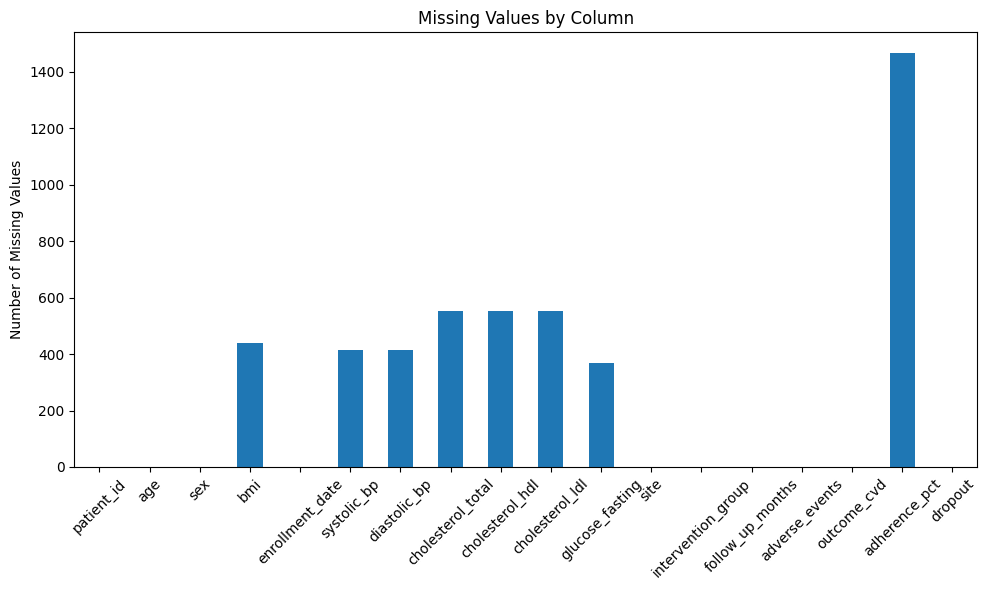

In [2]:
# TODO: Detect and analyze missing data
# 1. Use detect_missing(df) to get missing value counts
# 2. Calculate percentage of missing values per column  
# 3. Print both counts and percentages
# 4. Identify which columns have missing data

# Optional: Use the visualization function above to create a bar chart
# visualize_missing_data(missing_counts)
missing_counts = detect_missing(df)
missing_percent = (missing_counts / len(df)) * 100
print("Missing Value Counts:\n", missing_counts)
print("\nMissing Value Percentages (%):\n", missing_percent)
visualize_missing_data(missing_counts)

## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [3]:
# TODO: Compare imputation strategies
col = 'cholesterol_total'
original_mean = df[col].mean()
original_median = df[col].median()
print(f"Original mean: {original_mean:.2f}, median: {original_median:.2f}")

mean_imputed = fill_missing(df, col, strategy='mean')
mean_filled = mean_imputed[col].isna().sum()

median_imputed = fill_missing(df, col, strategy='median')
median_filled = median_imputed[col].isna().sum()

ffill_imputed = df[col].fillna(method='ffill')
ffill_filled = ffill_imputed.isna().sum()

summary = pd.DataFrame({
    "Strategy": ["Mean", "Median", "Forward Fill"],
    "New Mean": [mean_imputed[col].mean(), median_imputed[col].mean(), ffill_imputed.mean()],
    "New Median": [mean_imputed[col].median(), median_imputed[col].median(), ffill_imputed.median()],
    "Missing Remaining": [mean_filled, median_filled, ffill_filled]
})
print(summary)

Original mean: 178.04, median: 177.00


       Strategy    New Mean  New Median  Missing Remaining
0          Mean  178.039488  178.039488                  0
1        Median  177.981900  177.000000                  0
2  Forward Fill  178.070500  177.000000                  0


/tmp/ipykernel_84988/2535334757.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_imputed = df[col].fillna(method='ffill')


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [4]:
# TODO: Drop missing rows with different strategies
drop_any = df.dropna()
print(f"Rows remaining after dropna(): {len(drop_any)}")
drop_specific = df.dropna(subset=['age', 'bmi'])
print(f"Rows remaining after dropping only if age/bmi missing: {len(drop_specific)}")
if len(drop_any) > len(drop_specific):
    print("Dropping specific columns loses less data.")
else:
    print("Dropping specific columns retains more data.")

Rows remaining after dropna(): 7133
Rows remaining after dropping only if age/bmi missing: 9562
Dropping specific columns retains more data.


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [5]:
# TODO: Create and save clean dataset
numeric_cols = df.select_dtypes(include=np.number).columns
df_clean = df.copy()
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

df_clean = df_clean.dropna(subset=['patient_id', 'age'])

df_clean.to_csv('output/q5_cleaned_data.csv', index=False)

with open('output/q5_missing_report.txt', 'w') as f:
    f.write("Missing data cleaned using mean imputation for numeric columns.\n")
    f.write(f"Rows remaining: {len(df_clean)}\n")

## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

TODO: Explain your strategy choice

I would recommend mean imputation for continuous variables (like cholesterol) because it maintains the overall data distribution when missingness is low and random (MCAR). It avoids data loss from dropping rows and is computationally simple. However, for skewed distributions, median imputation might be more robust. Forward fill can introduce bias unless the data are time-ordered.